## Imports & Load dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', False)

In [3]:
ipl_df = pd.read_csv('ipl_ball_by_ball_updated.csv')

In [4]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ipl_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [6]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

## Additional Colums:

In [7]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [8]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [9]:
ipl_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [24]:
ipl_df[ipl_df.batting_team == 'Mumbai Indians'].total_runs.value_counts()

total_runs
1    11336
0    9974 
4    3198 
2    1721 
6    1403 
3    104  
5    54   
7    7    
Name: count, dtype: int64

In [22]:
ipl_df[ipl_df.batting_team == 'Chennai Super Kings'].total_runs.value_counts()

total_runs
1    10515
0    8661 
4    2829 
2    1706 
6    1259 
3    98   
5    46   
7    9    
Name: count, dtype: int64

## Choose Teams:

In [25]:
# t1 - bat first, t2 - bat second
# Ex: MI vs RCB, (match_id: 1254058) 

t1 = 'Mumbai Indians'
t2 = 'Chennai Super Kings'

## Choose a Match b/w these Teams:

In [28]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([ 392181,  392227,  501221,  598002,  598046,  598073,  729303,
        733995,  734045,  829729,  829817,  829823, 1136561, 1175370,
       1178419, 1181768, 1216492, 1304079], dtype=int64)

In [29]:
required_match_id = 1181768

In [30]:
ipl_df[ipl_df.match_id == required_match_id].head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
178810,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [31]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [32]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [33]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [34]:
t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        

t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [35]:
t1_outcomes_count

[9974, 11336, 1721, 104, 3198, 1403, 1378]

In [36]:
t2_outcomes_count

[8661, 10515, 1706, 98, 2829, 1259, 1087]

In [37]:
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]

In [38]:
t1_pb, t2_pb

([0.3425843236930686,
  0.3893659407845023,
  0.05911245448924916,
  0.003572164594353232,
  0.10984406127636188,
  0.04818987428728447,
  0.047331180875180325],
 [0.33114127317912445,
  0.4020263811890652,
  0.06522653412349455,
  0.0037468935194035556,
  0.10816287516727204,
  0.04813611164213343,
  0.041559931179506786])

In [39]:
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

In [40]:
# first innings
i1p_0 = t1_cum_pb[0]
i1p_1 = t1_cum_pb[1]
i1p_2 = t1_cum_pb[2]
i1p_3 = t1_cum_pb[3]
i1p_4 = t1_cum_pb[4]
i1p_6 = t1_cum_pb[5]
i1p_w = 1

pred_runs = 0
pred_wks = 0

for i in range(120):
    r_value = np.random.random()

    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1
        if pred_wks == 10:
            break

## Function: 1st Innings runs prediction 

In [41]:
# first innings
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs

In [42]:
# innings_1_runs(curr_overs, curr_score, curr_wickets)
innings_1_runs(10.0, 100, 0)

168

## Function: 2nd Innings runs prediction 

In [43]:
# second innings
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        
        if pred_runs > target:
            break

    return pred_runs

In [44]:
# innings_2_runs(curr_overs, curr_score, curr_wickets, target)
innings_2_runs(10.0, 100, 0, 167)

158

In [45]:
mdf = ipl_df[ipl_df.match_id == required_match_id]

In [46]:
mdf.reset_index(inplace = True, drop = True)

In [47]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [48]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

In [49]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

## Runs prediction: 1st Innings

In [50]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_overs = df_ing1.ball[i]
    curr_wickets += df_ing1.isOut[i]
    
    prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing1_runs_pred.append(prediction)

In [51]:
ing1_actual_score = sum(df_ing1.total_runs)

## Runs prediction: 2nd Innings

In [52]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)
#     print('target: ', target)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)

## Runs prediction chart: 1st Innings

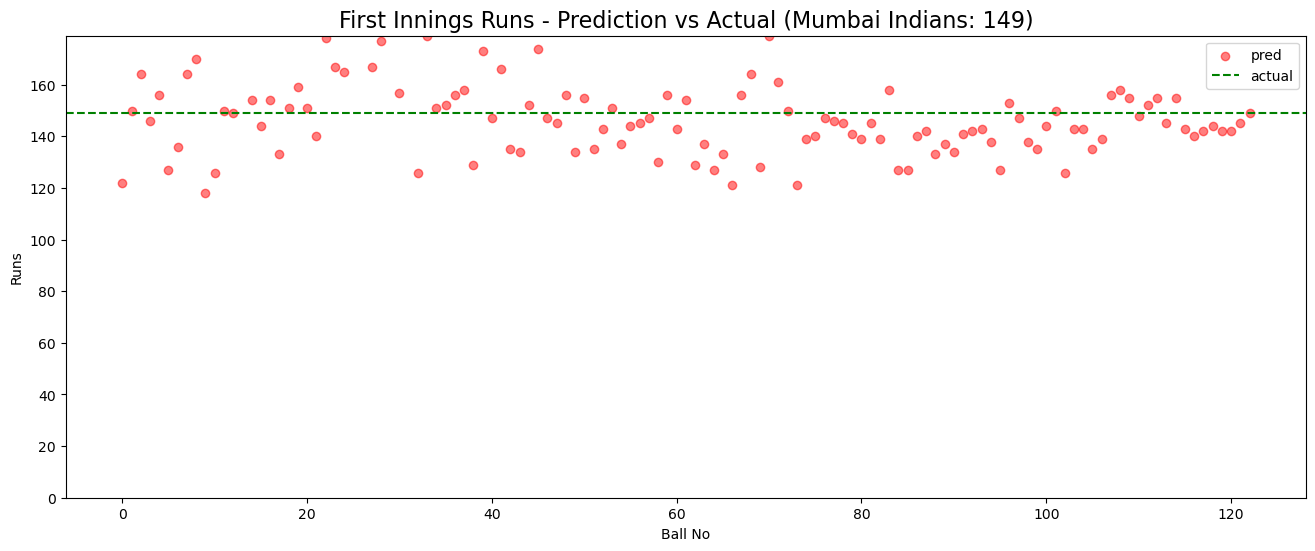

In [53]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

### Error in 1st Innings runs:

In [54]:
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])

12.048780487804878

In [55]:
ing2_actual_score = sum(df_ing2.total_runs)

## Runs prediction chart: 2nd Innings

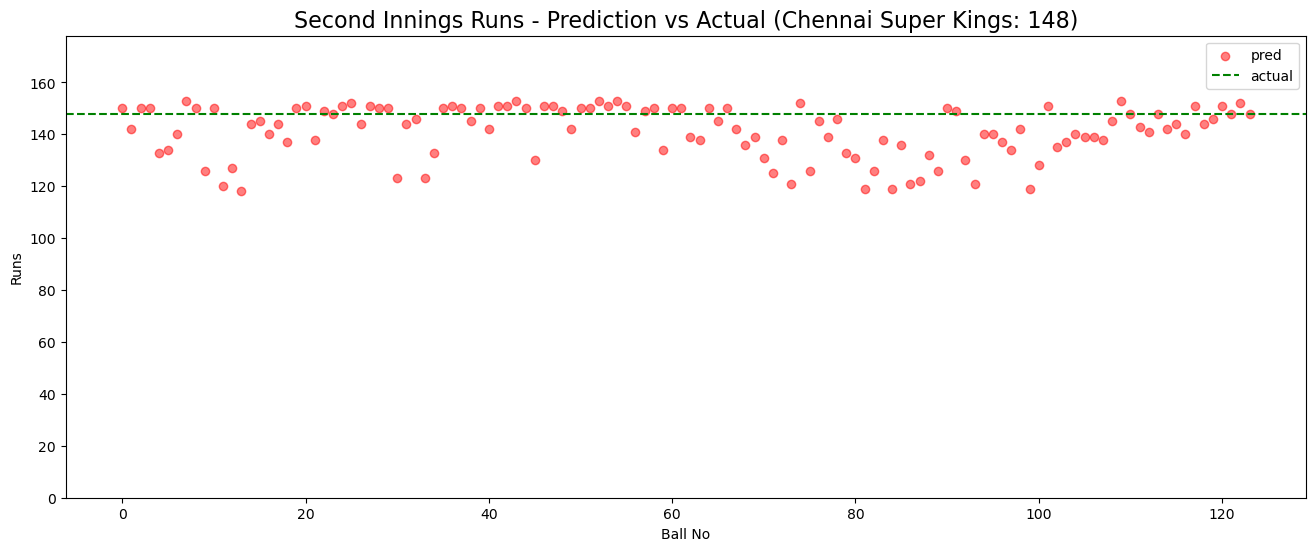

In [56]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

### Error in 2nd Innings runs:

In [57]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

8.548387096774194

## Win predictions: 1st Innings

In [58]:
# 1, 2 innings & predict win 

# for each ball make a prediction: 1st runs, 2nd runs, win/lose/tie

# initialize win/tie/lose
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(ing1_prediction, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

## Win predictions: 2nd Innings

In [59]:
# each ball
#2nd innings values
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

for i in range(len(df_ing2)):
    
    # 1st innings values
    target = ing1_actual_score
    
    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(target, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

## Win Percentage Chart:

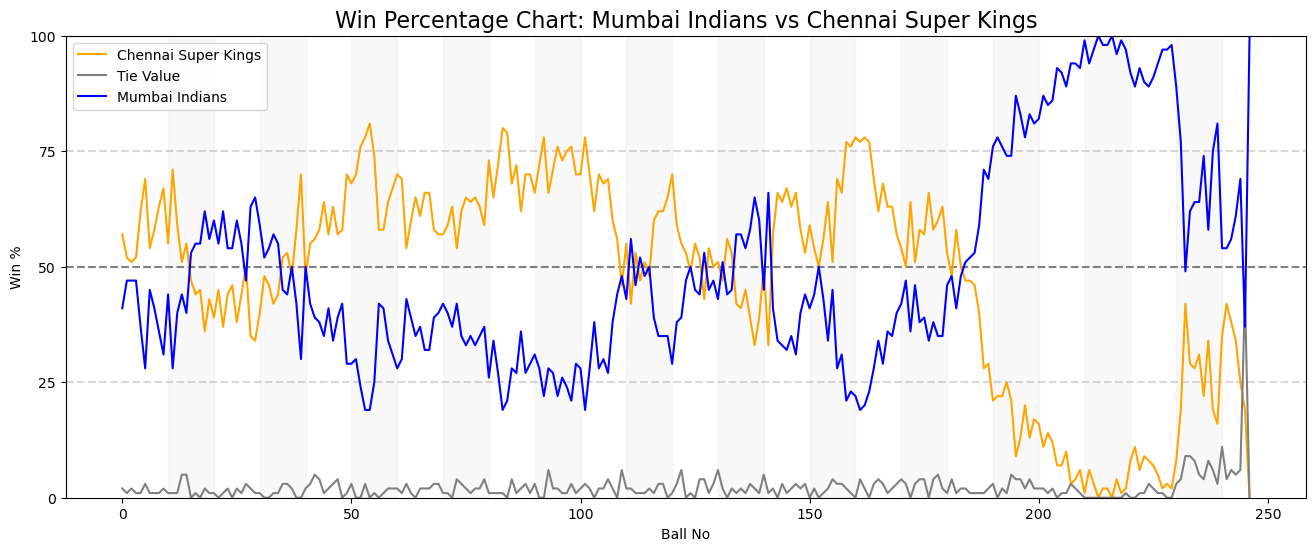

In [60]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])


# add confidence interval
# ci = 3
# plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
# plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
# plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()